📌 **Automatyczna klasyfikacja rodzajów chmur**

## 🏆 Kamień Milowy 1: Zrozumienie problemu i eksploracja danych

Celem projektu jest stworzenie modelu do **automatycznej klasyfikacji rodzajów chmur** na podstawie obrazów. Może to znaleźć zastosowanie w wielu dziedzinach:

### 🌦️ **Potencjalne zastosowania:**
- **Prognozowanie pogody** ☁️  
  Automatyczna analiza chmur może wspierać modele predykcyjne, poprawiając dokładność krótkoterminowych prognoz pogody. Można np. wykrywać nadchodzące burze lub przewidywać opady deszczu na podstawie formacji chmur.
  
- **Analiza klimatu** 🌍  
  Długoterminowe monitorowanie typów chmur pozwala na analizę zmian klimatycznych. Może pomóc w badaniach nad wpływem zjawisk atmosferycznych na globalne ocieplenie i wzorce pogodowe.

- **Wsparcie działalności rolniczej** 🌱  
  Rolnicy mogą korzystać z systemów monitorujących zachmurzenie w celu optymalizacji nawadniania oraz zapobiegania skutkom ekstremalnych warunków pogodowych, takich jak susze czy ulewne deszcze.

- **Monitorowanie jakości powietrza** 🌫️  
  Analiza chmur może pomóc w wykrywaniu zanieczyszczeń powietrza i ich wpływu na atmosferę. Specyficzne rodzaje chmur mogą wskazywać na obecność pyłów, smogu czy związków chemicznych.

- **Lotnictwo i nawigacja** ✈️  
  Automatyczna klasyfikacja chmur może wspierać systemy lotnicze, pomagając pilotom i kontrolerom ruchu lotniczego w ocenie warunków atmosferycznych i potencjalnych zagrożeń.

- **Badania astronomiczne** 🔭  
  W astronomii monitorowanie zachmurzenia jest kluczowe dla obserwacji kosmosu. Automatyczna klasyfikacja chmur może pomóc w wyborze optymalnych warunków do prowadzenia badań oraz w sterowaniu teleskopami.

- **Turystyka** 🚶‍♂️☁️  
  Analiza chmur pozwala przewidzieć, czy warunki będą sprzyjające. Klasyfikacja na rainy, cloudy i clear pomaga ocenić, czy warto wybrać się na spacer – clear oznacza dobrą pogodę, cloudy wskazuje na możliwe zachmurzenie, a rainy ostrzega przed deszczem.  


---

🎯 **Miary sukcesu:**
Aby ocenić skuteczność modelu klasyfikującego chmury, będziemy korzystać z następujących metryk:

- **Dokładność klasyfikacji (accuracy)** 🎯  
  Sprawdza, jaka część wszystkich przewidywań jest poprawna. Jest to podstawowa metryka, ale w przypadku niezbalansowanych danych może być myląca.

- **Precyzja (precision)** 🎯  
  Wskazuje, jak wiele z przewidzianych przykładów danej klasy faktycznie do niej należy. Jest kluczowa, gdy zależy nam na minimalizacji fałszywych alarmów (np. błędnej klasyfikacji chmur deszczowych jako bezchmurnego nieba).

- **Pełność (recall)** 📢  
  Mierzy, jak wiele z rzeczywistych przykładów danej klasy zostało poprawnie wykrytych. Jest istotna np. przy wykrywaniu niebezpiecznych zjawisk pogodowych – lepiej wykryć wszystkie przypadki niż przegapić istotne.

- **F1-score** ⚖️  
  To połączenie precyzji i pełności – kluczowe w przypadku nierównomiernie reprezentowanych klas, ponieważ uwzględnia zarówno błędne pozytywne, jak i błędne negatywne klasyfikacje.

- **Macierz błędów (confusion matrix)** 🔎  
  Pozwoli szczegółowo przeanalizować, które klasy są najczęściej ze sobą mylone. Może to wskazać np., że model ma trudności z odróżnianiem chmur „Cloudy” od „Rainy”, co mogłoby wymagać dodatkowych danych lub innej reprezentacji cech.


**Wybór metryki zależy od zastosowania** 📊  
  W niektórych przypadkach wszystkie klasy są równie ważne, więc kluczowa jest ogólna skuteczność modelu. W innych istotniejsze może być dokładniejsze rozpoznawanie jednej z klas, np. gdy wykrywanie deszczu jest ważniejsze niż chmur bez opadów. Dlatego dobór metryki powinien uwzględniać specyfikę problemu.  

---

📌 **Podsumowanie:**  
Dzięki temu podejściu możemy nie tylko stworzyć skuteczny model klasyfikacyjny, ale także zidentyfikować jego słabe strony i potencjalne ulepszenia. W kolejnych etapach skupimy się na poprawie jakości predykcji oraz na testowaniu różnych architektur modeli. 🚀


In [21]:
import tensorflow as tf
import os
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

from IPython.display import display
from IPython.core.display import HTML
display(HTML("<style>.output_scroll { height: auto; }</style>"))



## 🔍 Eksploracja i analiza danych
Zbiory danych znajdują się w katalogach:

In [22]:
train_dir = "cloud_dataset/train"
test_dir = "cloud_dataset/test"
val_dir = "cloud_dataset/val"

img_width, img_heigth = 150, 150
batch_size = 32

## 📸 Przykładowe obrazy w zbiorze treningowym

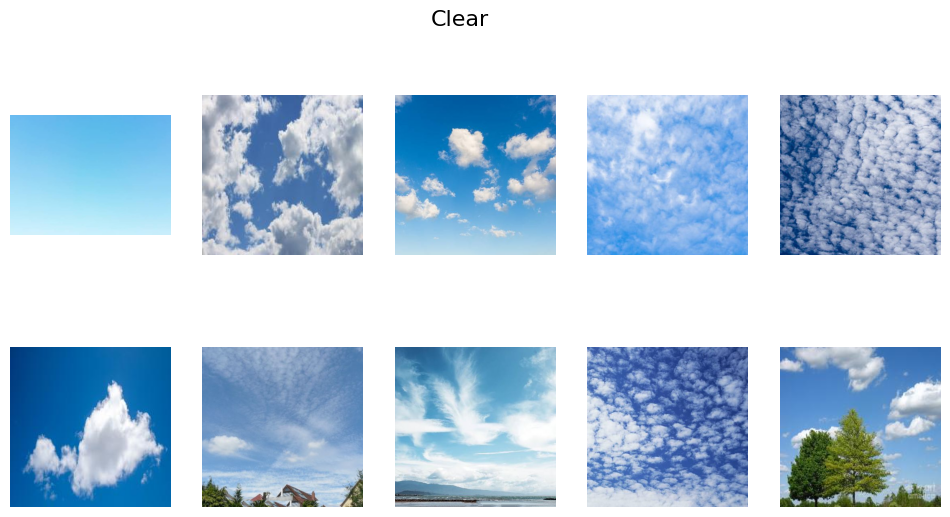

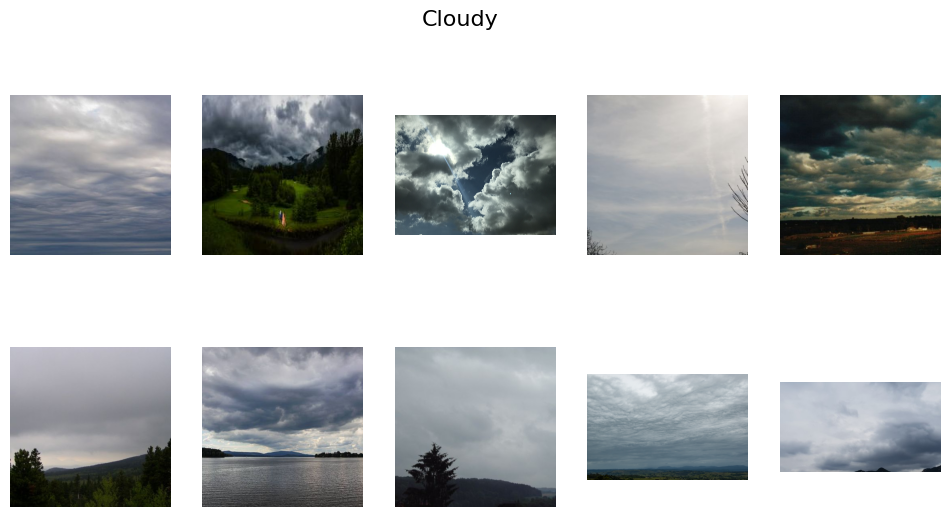

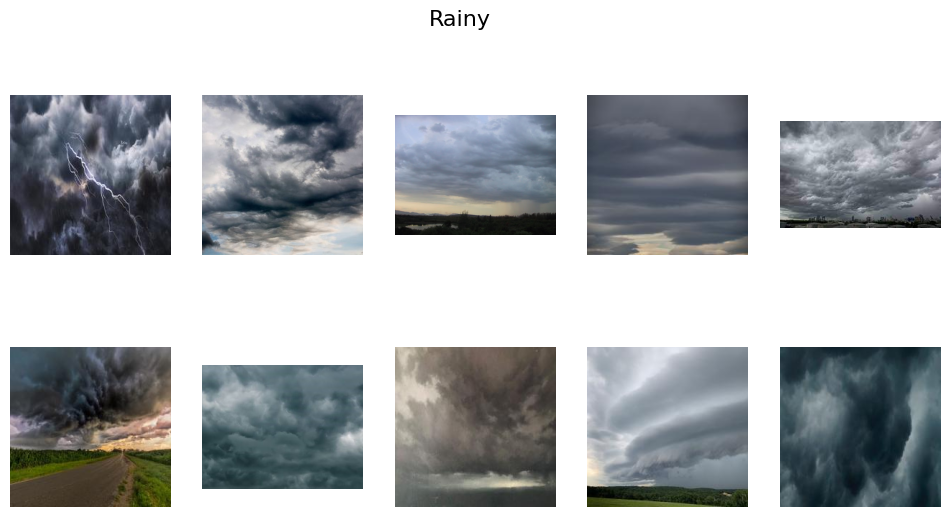

In [23]:
import random
def show_sample_images(directory, class_name, num_images=10):
    sample_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                sample_files.append(os.path.join(root, file))
    random.shuffle(sample_files)
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{class_name}", fontsize=16)
    for i in range(min(num_images, len(sample_files))):
        img = Image.open(sample_files[i])
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

show_sample_images(train_dir+"/Clear", "Clear")
show_sample_images(train_dir+"/Cloudy", "Cloudy")
show_sample_images(train_dir+"/Rainy", "Rainy")

    

### 🔍 Kluczowe obserwacje:
Podczas eksploracji danych zauważono, że:
- Obrazy w klasie **Clear** są wyraźnie różne od pozostałych, cechują się niebem bez chmur. ☀️
- Klasy **Cloudy** i **Rainy** są wizualnie podobne, co może powodować trudności w klasyfikacji. 🌫️🌧️
- Niektóre obrazy w klasie **Rainy** mogą przypominać te z **Cloudy**, zwłaszcza gdy deszcz nie jest dobrze widoczny.

## 📊 Analiza ilościowa danych

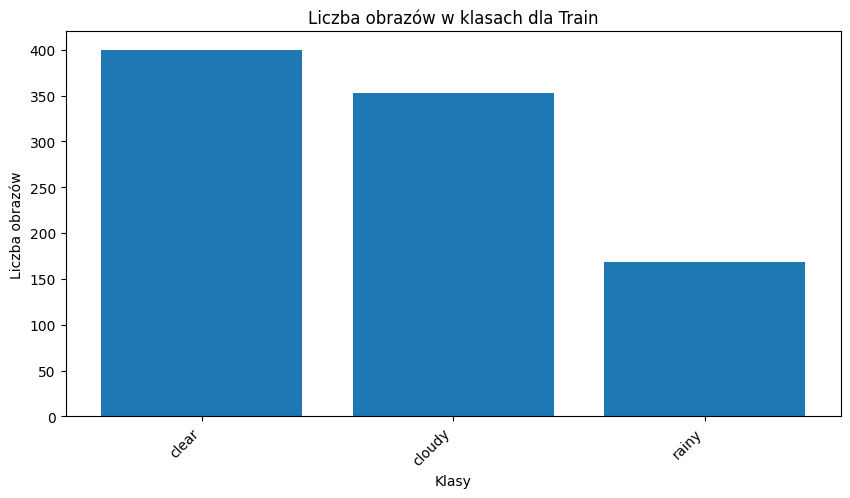

In [24]:
def analyze_and_plot(directory, dataset_name):
    classes = []
    image_counts = []
    
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):  # Sprawdzamy, czy to folder
            num_images = len(os.listdir(class_dir))
            classes.append(class_name)
            image_counts.append(num_images)
    
    # Tworzenie wykresu słupkowego
    plt.figure(figsize=(10, 5))
    plt.bar(classes, image_counts)
    plt.xlabel("Klasy")
    plt.ylabel("Liczba obrazów")
    plt.title(f"Liczba obrazów w klasach dla {dataset_name}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

analyze_and_plot(train_dir, "Train")
# analyze_and_plot(val_dir, "Validation")
# analyze_and_plot(test_dir, "Test")

# 🚨 Wykrywanie anomalii


In [25]:
def check_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except Exception as e:
        print(f"Uszkodzony obraz {file_path}, błąd {e}")
        return False
def check_rgb(file_path):
    img = Image.open(file_path)
    if img.mode != "RGB":
        # print(file_path)
        # img = img.convert("RGB")
        # img.save(file_path)
        # os.remove(file_path)
        return False
    return True

count_bad = 0
count_not_rgb = 0
for root, dir, files in os.walk(train_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if not check_image(file_path):
            count_bad += 1
        if not check_rgb(file_path):
            count_not_rgb += 1
            
print("tyle obrazow jest zlych: ", count_bad)
print("Byl 1 nie w rgb i zostal usuniety")
print("tyle obrazow nie jest w rgb: ", count_not_rgb)

tyle obrazow jest zlych:  0
Byl 1 nie w rgb i zostal usuniety
tyle obrazow nie jest w rgb:  0


Liczba wszystkich zdjec:  918
Liczba nieoutlierow:  861


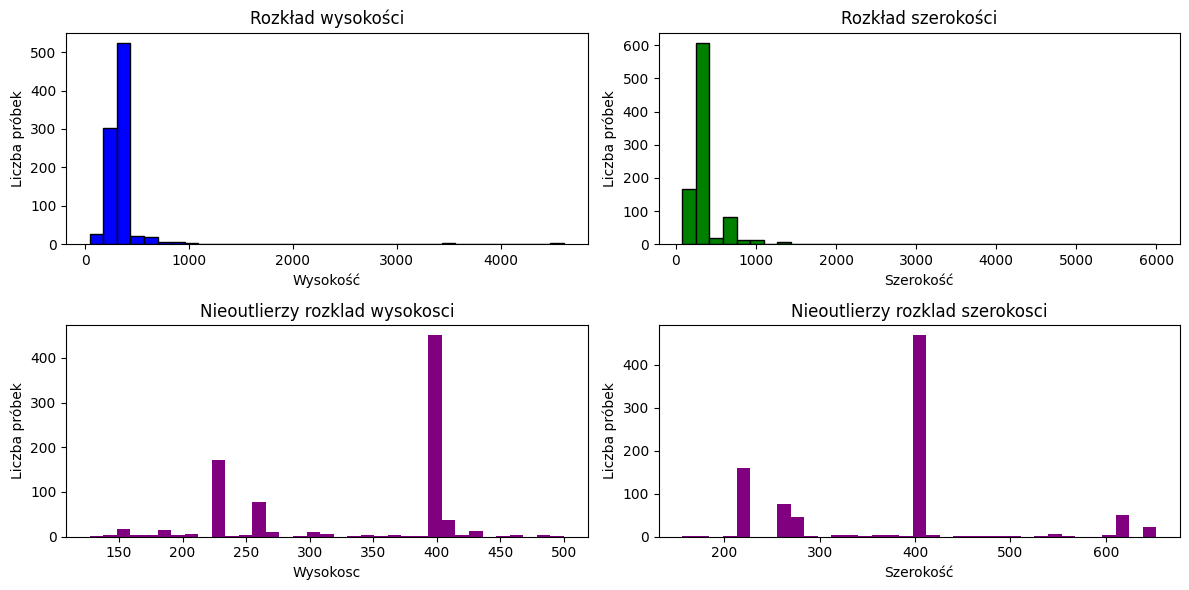

In [26]:
def check_image_sizes(directory):
    size_list = np.empty((0, 2))
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    size_list = np.append(size_list, [[img.size[0], img.size[1]]], axis = 0)
    return size_list

size_list = check_image_sizes('cloud_dataset/train')


# print(f"Rozmiar wszystkich {size_list.shape}")

# print(f"srednia {np.mean(size_list, axis=0)}")
# print(f"minimum {np.min(size_list, axis=0)}")
# print(f"maksimum {np.max(size_list, axis=0)}")


plt.figure(figsize=(12,6))
# Histogram dla wysokości
plt.subplot(2, 2, 1)  # 1 wiersz, 2 kolumny, pierwszy wykres
plt.hist(size_list[:, 1], bins=35, color='blue', edgecolor='black')
plt.title('Rozkład wysokości')
plt.xlabel('Wysokość')
plt.ylabel('Liczba próbek')


# Histogram dla szerokości
plt.subplot(2, 2, 2)  # 1 wiersz, 2 kolumny, drugi wykres
plt.hist(size_list[:, 0], bins=35, color='green', edgecolor='black')
plt.title('Rozkład szerokości')
plt.xlabel('Szerokość')
plt.ylabel('Liczba próbek')


width_condition_max = size_list[:, 0] < 700
height_condition_max = size_list[:, 1] < 550
conditions_max = width_condition_max & height_condition_max

width_condition_min = size_list[:, 0] > 100
height_condition_min = size_list[:, 1] > 100
conditions_min = width_condition_min & height_condition_min

conditions = conditions_max & conditions_min

not_outlayers = size_list[conditions]
print("Liczba wszystkich zdjec: ", size_list.shape[0])
print("Liczba nieoutlierow: ", not_outlayers.shape[0])


plt.subplot(2, 2, 3)
plt.hist(not_outlayers[:, 1], bins=35, color="purple")
plt.title("Nieoutlierzy rozklad wysokosci")
plt.xlabel('Wysokosc')
plt.ylabel('Liczba próbek')

plt.subplot(2, 2, 4)
plt.hist(not_outlayers[:, 0], bins=35, color="purple")
plt.title("Nieoutlierzy rozklad szerokosci")
plt.xlabel('Szerokość')
plt.ylabel('Liczba próbek')
plt.tight_layout()

In [27]:
def is_valid(image):
    width, height = image.size[0], image.size[1]
    return width > 100 and width < 700 and height > 100 and height < 550

valid_images = []
classes = []

for root, dir, files in os.walk(train_dir):
    for file in files:
        file_path = os.path.join(root, file)
        with Image.open(file_path) as img:
            if is_valid(img):
                valid_images.append(file_path)
                classes.append(os.path.basename(root))

df = pd.DataFrame({'filename': valid_images, 'class': classes})

###  **Mamy naprzykład taki obraz ktory zdecydowanie nie jest rzeczywistym zdjęciem chmury**

![Mamy naprzykład taki obraz ktory zdecydowanie nie jest rzeczywistym zdjęciem chmury](cloud_dataset\train\Rainy\original_size_img_77_jpg.rf.c3154c897671512abd8b90ebdb1b377c.jpg)


# 🛠️ Wstępne przetwarzanie danych


### 🎨 **1. Przekształcanie i normalizacja obrazów**

In [28]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = df,
    x_col = "filename",
    y_col = "class",
    target_size = (img_width, img_heigth),
    batch_size = batch_size,
    class_mode = "categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_heigth),
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 862 validated image filenames belonging to 3 classes.
Found 112 images belonging to 3 classes.


### 🔍 **2. Augmentacja danych**

Found 862 validated image filenames belonging to 3 classes.


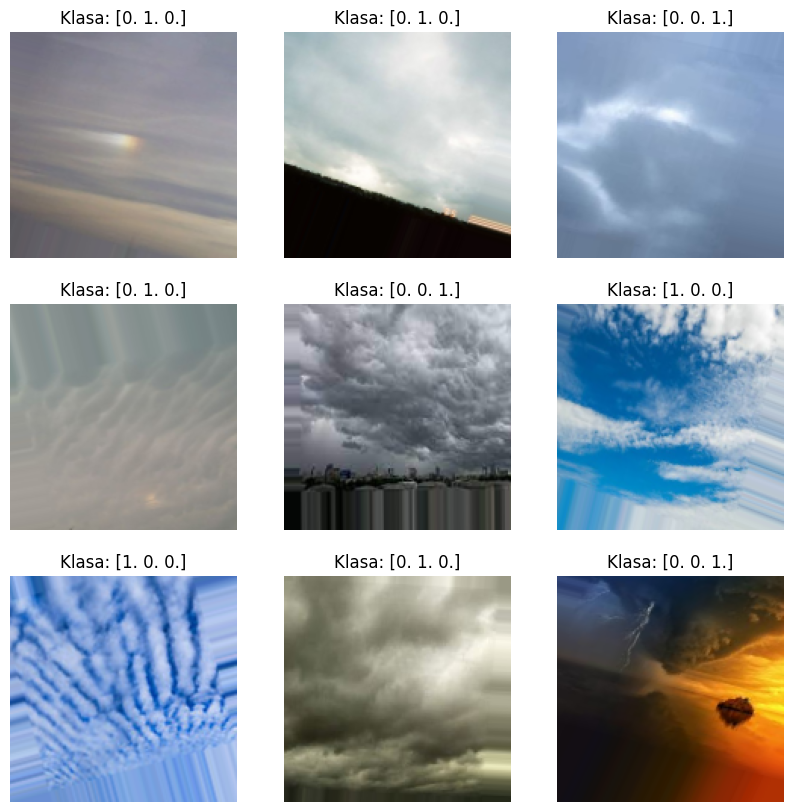

In [29]:
train_augmented_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

train_augmented_generator = train_augmented_datagen.flow_from_dataframe(
    dataframe = df,
    x_col = "filename",
    y_col = "class",
    target_size = (img_width, img_heigth),
    batch_size = batch_size,
    class_mode = "categorical"
)


images, labels = next(train_augmented_generator)


plt.figure(figsize=(10, 10))
for i in range(9):  # Wyświetl 9 obrazów
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Klasa: {labels[i]}")
    plt.axis("off")

plt.show()



### 📌 Podsumowanie
Wykonano eksplorację i wstępną analizę zbioru danych. Zidentyfikowano liczność obrazów dla poszczególnych klas i sprawdzono przykładowe obrazy. W kolejnym kroku przygotujemy model do klasyfikacji chmur.